In [7]:
import pandas as pd

In [9]:
#lecture du jeu de données , low_memory pour éviter les erreurs dans les colonnes avec mixed data types
df = pd.read_csv('C:\\Users\\shera\\OneDrive\\Documents\\Lending_Club_dataset\\accepted\\accepted.csv', low_memory=False)

In [10]:
# on jette un coup d'oeil sur la forme du dataset 
print(df.shape)

(2260701, 151)


On constate qu'il y a 151 colonnes, on va tenter de prendre un sous ensemble de colonnes seulement, les colonnes clé.

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
threshold = int(0.3*len(df.columns))
df.dropna(thresh=threshold)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,NaN,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260695,88977788,NaN,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0


# Data Cleaning

In [16]:
#on supprime les lignes qui contiennent plus de 70% de valeurs null
df = df.dropna(thresh=threshold)
df.shape

(2260668, 151)

In [17]:
df[df['member_id'].notna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


In [18]:
#on se débarasse de member_id puisqu'elle ne contient que des valeurs NULL
df=df.drop(columns=['member_id'])

In [19]:
#on jette toutes les colonnes qui ont 100% des valeurs NaN
df_reduced = df.dropna(axis=1, how='all')
df_reduced.shape


(2260668, 150)

In [20]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260668 entries, 0 to 2260698
Columns: 150 entries, id to settlement_term
dtypes: float64(112), object(38)
memory usage: 2.5+ GB


In [21]:
percentage_missing = df_reduced.isnull().sum() / len(df_reduced) * 100

In [22]:
print(percentage_missing) #ici , on regarde le pourcentage des valeur manquantes de chaque variable

id                        0.000000
loan_amnt                 0.000000
funded_amnt               0.000000
funded_amnt_inv           0.000000
term                      0.000000
                           ...    
settlement_status        98.485138
settlement_date          98.485138
settlement_amount        98.485138
settlement_percentage    98.485138
settlement_term          98.485138
Length: 150, dtype: float64


In [23]:
df_neat = pd.DataFrame(columns=df_reduced.columns, index=None)
df_neat.loc['percentage']=percentage_missing.values

In [24]:
pd.set_option('display.max_columns', None)



In [25]:
#On ne garde queles colonnes qui contiennent moins de 20% de NaN
colonnes_gardes = df_neat.columns[percentage_missing < 30].to_list()


In [26]:
print(colonnes_gardes)

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct

In [27]:
print("nombre de colonnes avant :" , len(df_neat.columns))
print("nombre de colonnes après :" , len(colonnes_gardes))

nombre de colonnes avant : 150
nombre de colonnes après : 93


ce n'est toujours pas assez, on a besoin de plus de nettoyage

In [29]:
df_reduced=df_reduced[colonnes_gardes]



Les variables suivantes sont utilisées pour prédire l'accord d'un prêt bancaire :

### Caractéristiques du prêt
- **loan_amnt** : Montant demandé 
- **term** : Durée du prêt (ex. "36 months").
- **int_rate** : Taux d’intérêt (%).
- **installment** : Mensualité (en $).
- **grade** : Note de risque (A à G).
- **sub_grade** : Sous-note détaillée (ex. A1).

### Situation personnelle
- **emp_length** : Ancienneté dans l’emploi (ex. "10+ years").
- **home_ownership** : Statut logement (ex. "RENT").

### Revenu et endettement
- **annual_inc** : Revenu annuel (en $).
- **verification_status** : Vérification revenu (ex. "Verified").
- **dti** : Ratio dette/revenu (%).

### Historique de crédit
- **delinq_2yrs** : Défauts sur 2 ans.
- **inq_last_6mths** : Demandes récentes de crédit.
- **open_acc** : Comptes actifs.
- **pub_rec** : Incidents publics.
- **revol_bal** : Solde crédits renouvelables (en $).
- **revol_util** : Utilisation crédits renouvelables (%).
- **total_acc** : Total comptes.

### Prêt en cours
- **last_pymnt_amnt** : Dernier paiement (en $).

### Cible
- **loan_status** : Statut prêt (ex. "Fully Paid"). À binariser pour la prédiction.

In [32]:
nos_features=['loan_amnt','term', 'int_rate', 'installment', 'grade', 'sub_grade','emp_length','home_ownership',
                'annual_inc','verification_status','purpose','dti','delinq_2yrs','inq_last_6mths','open_acc',
                'pub_rec','revol_bal','revol_util','total_acc','last_pymnt_amnt','loan_status']


In [33]:
len(nos_features)

21

In [34]:
df_reduced=df_reduced[nos_features]

In [35]:
df_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,500.00,8000.00,12900.00,20000.00,4.000000e+04
int_rate,2260668.0,13.092829,4.832138,5.31,9.49,12.62,15.99,3.099000e+01
installment,2260668.0,445.806823,267.173535,4.93,251.65,377.99,593.32,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2258957.0,18.824196,14.183329,-1.00,11.89,17.84,24.49,9.990000e+02
delinq_2yrs,2260639.0,0.306879,0.867230,0.00,0.00,0.00,0.00,5.800000e+01
inq_last_6mths,2260638.0,0.576835,0.885963,0.00,0.00,0.00,1.00,3.300000e+01
open_acc,2260639.0,11.612402,5.640861,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2260639.0,0.197528,0.570515,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2260668.0,16658.458078,22948.305028,0.00,5950.00,11324.00,20246.00,2.904836e+06


In [38]:
#je jette un coup d'oeil sur les variables catégoriques 
print(df_reduced.select_dtypes(include=['object']).columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'loan_status'],
      dtype='object')


In [39]:
df_reduced['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Comme nous pouvons le constater, la variable loan_status comporte de nombreuses étiquettes, mais je souhaite que mon modèle prédise si le prêt a été intégralement remboursé ou radié. Dans mon cas, je sélectionne des colonnes considérés comme "bonnes" et "mauvaises" , donc je fais une encoding binaire, 1 pour les bonnes, 0 pour les mauvaises
    

In [41]:
good = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid']
bad = ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 
             'Does not meet the credit policy. Status:Charged Off']

In grace period et issued ne nous donnent pas des informations utiles pour la prédiction

In [43]:
df_reduced['loan_status']=df_reduced['loan_status'].apply(lambda x: 1 if x in good else (0 if x in bad else None))

In [44]:
print(df_reduced['loan_status'].isna().sum())

8436


In [45]:
df_reduced = df_reduced.dropna(axis=0, subset=['loan_status'])

In [46]:
print(df_reduced['loan_status'].isna().sum())

0


In [47]:

df_reduced.loc[:, 'emp_length'] = df_reduced['emp_length'].fillna(df_reduced['emp_length'].mode()[0])  
df_reduced.loc[:, 'revol_util'] = df_reduced['revol_util'].fillna(df_reduced['revol_util'].median())  
df_reduced.loc[:, 'annual_inc'] = df_reduced['annual_inc'].fillna(df_reduced['annual_inc'].median())  
df_reduced.loc[:, 'dti'] = df_reduced['dti'].fillna(df_reduced['dti'].median())  
df_reduced.loc[:, 'delinq_2yrs'] = df_reduced['delinq_2yrs'].fillna(df_reduced['delinq_2yrs'].median())  
df_reduced.loc[:, 'inq_last_6mths'] = df_reduced['inq_last_6mths'].fillna(df_reduced['inq_last_6mths'].median())
df_reduced.loc[:, 'open_acc'] = df_reduced['open_acc'].fillna(df_reduced['open_acc'].median())
df_reduced.loc[:, 'pub_rec'] = df_reduced['pub_rec'].fillna(df_reduced['pub_rec'].median())  
df_reduced.loc[:, 'total_acc'] = df_reduced['total_acc'].fillna(df_reduced['total_acc'].median()) 

In [48]:
df_reduced.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_pymnt_amnt        0
loan_status            0
dtype: int64

# Visualisation des données 
Pour une meilleure comprehénsion 

Text(0.5, 1.0, 'Pret payé vs non payé')

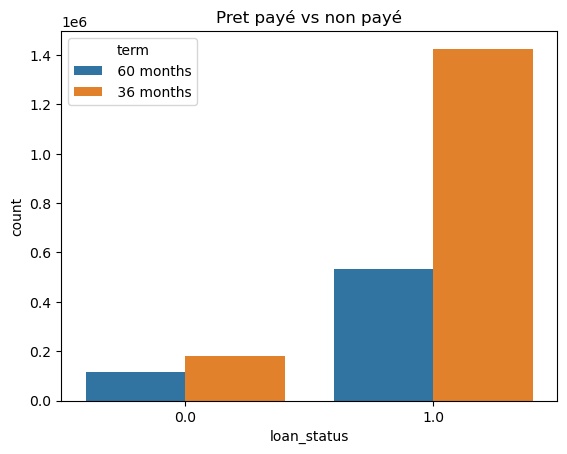

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.countplot(data=df_reduced, x='loan_status', hue='term').set_title("Pret payé vs non payé")


C:\Users\shera\AppData\Local\Temp\ipykernel_6696\2315836736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="emp_length",palette='spring')


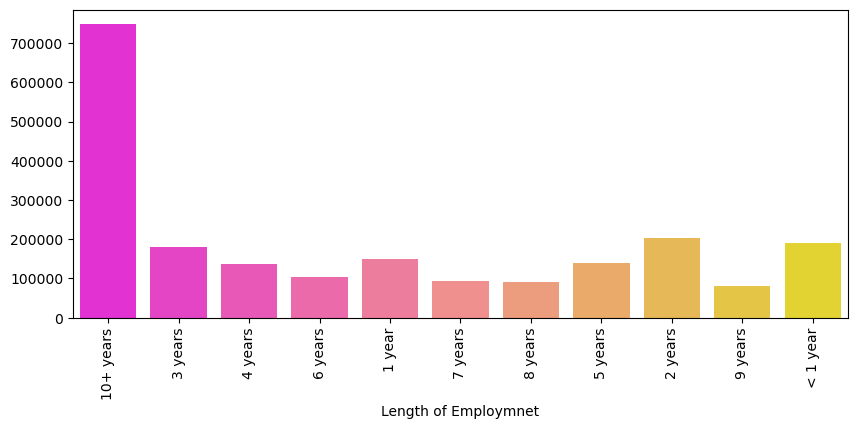

In [56]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df_reduced,x="emp_length",palette='spring')
ax.set(xlabel='Length of Employmnet', ylabel='')
plt.xticks(rotation='vertical')
plt.show()

C:\Users\shera\AppData\Local\Temp\ipykernel_6696\712580074.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reduced,y="grade",palette='spring')


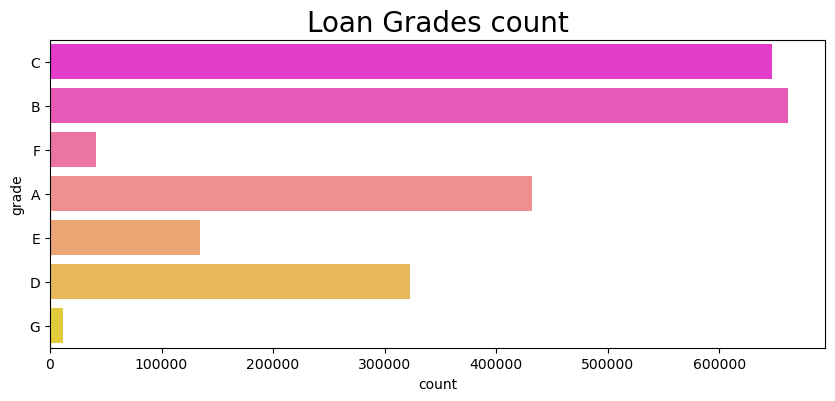

In [71]:
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df_reduced,y="grade",palette='spring')
ax.set_title('Loan Grades count', size=20)
plt.show()

C:\Users\shera\AppData\Local\Temp\ipykernel_6696\2107399604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reduced,x="home_ownership",y='annual_inc',palette='viridis')


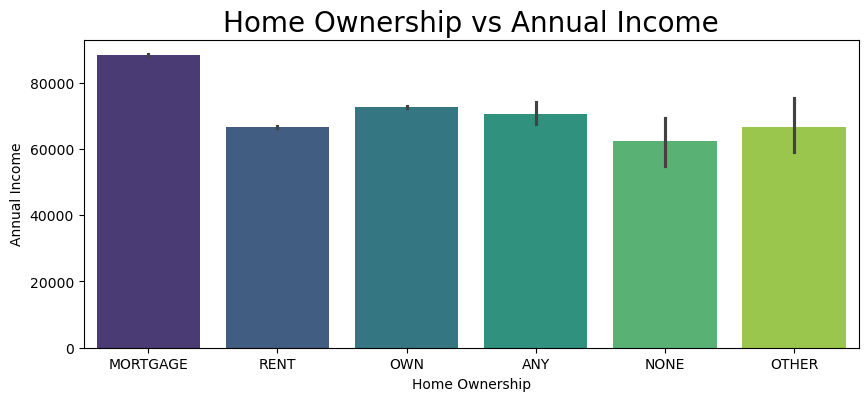

In [73]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df_reduced,x="home_ownership",y='annual_inc',palette='viridis')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

C:\Users\shera\AppData\Local\Temp\ipykernel_6696\1018083599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_reduced,x="purpose",y='loan_amnt',palette='spring')


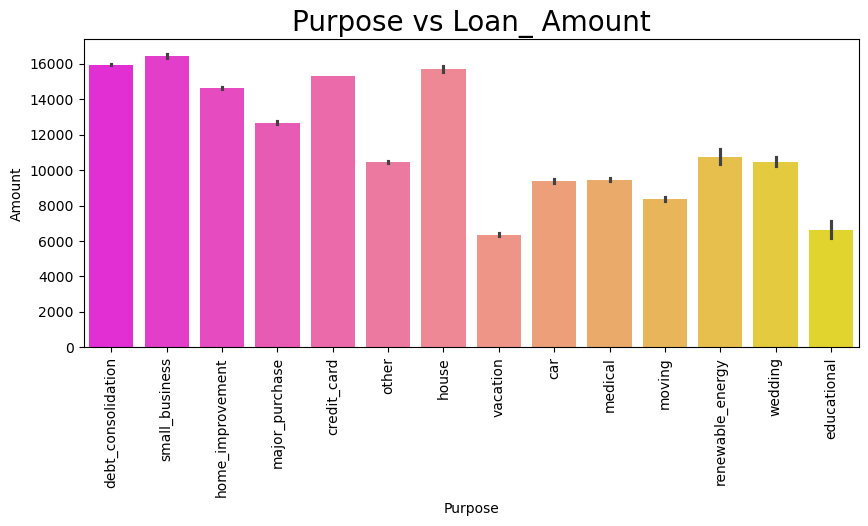

In [77]:
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df_reduced,x="purpose",y='loan_amnt',palette='spring')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [99]:
categorical=[feature for feature in df_reduced.columns if df_reduced[feature].dtype=='object']
numerical=[feature for feature in df_reduced.columns if feature not in categorical]

In [110]:
#plt.matshow(df_reduced[numerical].corr())

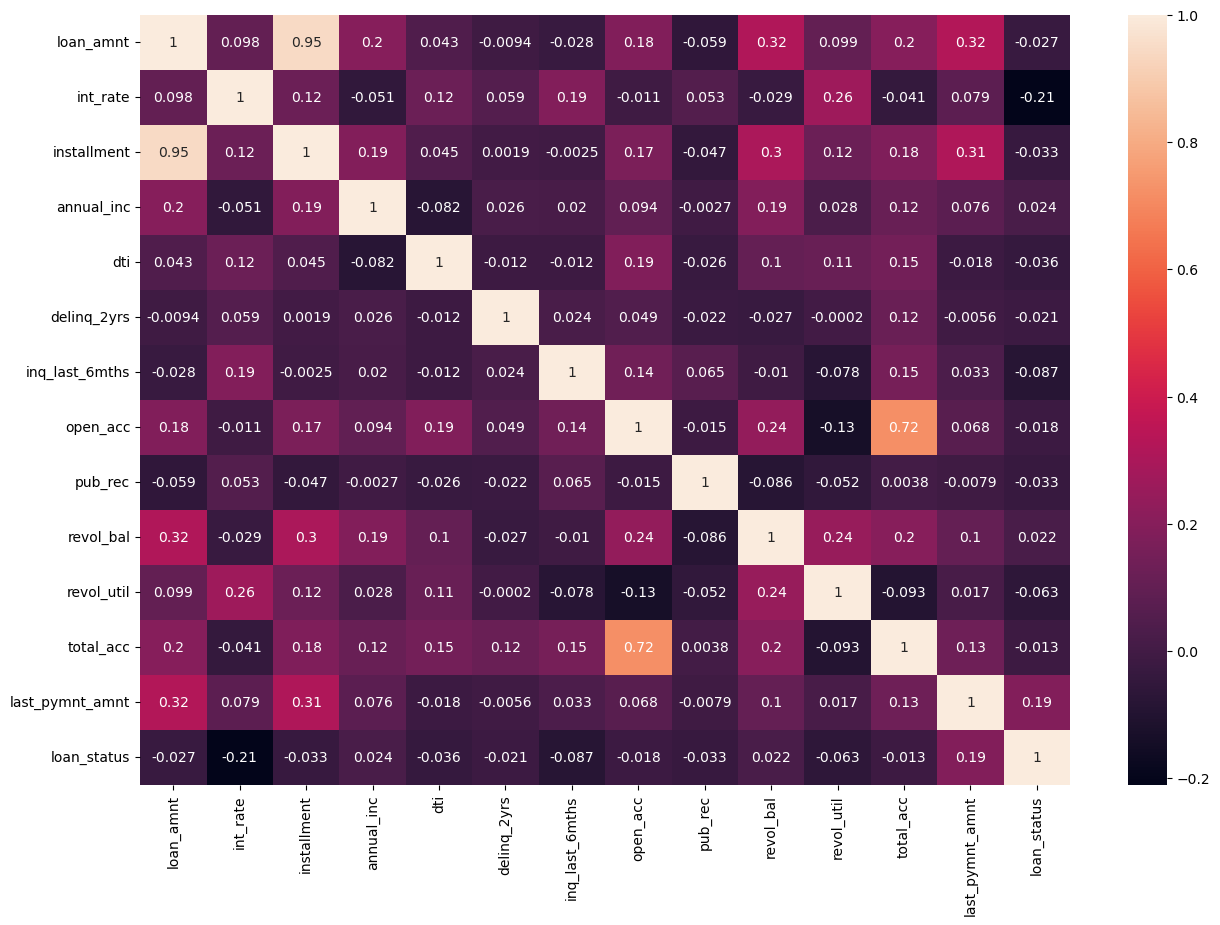

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(df_reduced[numerical].corr(),annot=True)
plt.show()